In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import calendar



In [3]:
#insitu_data=pd.DataFrame()
#read data
insitu_data = pd.read_csv(r'P:\analysis\Sandhya\bre_DEHB001_20200101-20201231.csv',sep =';',usecols=[0,2],header = 3)
#rename the column for convenience(NO2 column was named as stundenwerte.1)   
insitu_data.rename(columns={'Stundenwerte.1':'NO2'}, inplace=True)
insitu_data.rename(columns={'Messzeit (Angaben in MESZ bzw. MEZ)':'datetime'}, inplace=True)
# Since unit of time is MEZ(UTC+1),so,subtract 1 from time axis so that unit is UTC.
subtract_time = 1
insitu_data['datetime']=pd.to_datetime(insitu_data['datetime'])-datetime.timedelta(hours=subtract_time)
# converting column into string
insitu_data['datetime'] = insitu_data['datetime'].astype(str)
insitu_data[['date', 'time']] =insitu_data['datetime'].str.split(' ',1,  expand=True)
print(insitu_data)

                 datetime   NO2        date      time
0     2019-12-31 23:00:00  58.0  2019-12-31  23:00:00
1     2020-01-01 00:00:00  23.0  2020-01-01  00:00:00
2     2020-01-01 01:00:00  42.0  2020-01-01  01:00:00
3     2020-01-01 02:00:00  41.0  2020-01-01  02:00:00
4     2020-01-01 03:00:00  38.0  2020-01-01  03:00:00
...                   ...   ...         ...       ...
8778  2020-12-31 18:00:00  21.0  2020-12-31  18:00:00
8779  2020-12-31 19:00:00  25.0  2020-12-31  19:00:00
8780  2020-12-31 20:00:00  27.0  2020-12-31  20:00:00
8781  2020-12-31 21:00:00  26.0  2020-12-31  21:00:00
8782  2020-12-31 22:00:00  25.0  2020-12-31  22:00:00

[8783 rows x 4 columns]


## A.1 Hourly mean NO2 column averaged over all viewing directions

In [4]:
# let's add hour column in data set
hr=[]
for i in insitu_data['time']:
    hour = str(i[0:2])
    hr.append(int(hour))
insitu_data['hour']=hr
#insitu_data.append(insitu_data_day)
print(insitu_data)

                 datetime   NO2        date      time  hour
0     2019-12-31 23:00:00  58.0  2019-12-31  23:00:00    23
1     2020-01-01 00:00:00  23.0  2020-01-01  00:00:00     0
2     2020-01-01 01:00:00  42.0  2020-01-01  01:00:00     1
3     2020-01-01 02:00:00  41.0  2020-01-01  02:00:00     2
4     2020-01-01 03:00:00  38.0  2020-01-01  03:00:00     3
...                   ...   ...         ...       ...   ...
8778  2020-12-31 18:00:00  21.0  2020-12-31  18:00:00    18
8779  2020-12-31 19:00:00  25.0  2020-12-31  19:00:00    19
8780  2020-12-31 20:00:00  27.0  2020-12-31  20:00:00    20
8781  2020-12-31 21:00:00  26.0  2020-12-31  21:00:00    21
8782  2020-12-31 22:00:00  25.0  2020-12-31  22:00:00    22

[8783 rows x 5 columns]


In [5]:
# let's add month and day of week column in data set
mon = []
day_week_name = []
for i in insitu_data['date']:
    month = str(i[5:7])
    day = str(i[8:10])
    mon.append(int(month))
    day_date = datetime.date(2020, int(month), int(day)) 
    day_name=day_date.strftime("%A")
    #print(day_name)
    day_week_name.append(day_name)
insitu_data['month']=mon
insitu_data['day of week']=day_week_name
insitu_data['day of week'][0]= 'Tuesday'
print(insitu_data)

                 datetime   NO2        date      time  hour  month day of week
0     2019-12-31 23:00:00  58.0  2019-12-31  23:00:00    23     12     Tuesday
1     2020-01-01 00:00:00  23.0  2020-01-01  00:00:00     0      1   Wednesday
2     2020-01-01 01:00:00  42.0  2020-01-01  01:00:00     1      1   Wednesday
3     2020-01-01 02:00:00  41.0  2020-01-01  02:00:00     2      1   Wednesday
4     2020-01-01 03:00:00  38.0  2020-01-01  03:00:00     3      1   Wednesday
...                   ...   ...         ...       ...   ...    ...         ...
8778  2020-12-31 18:00:00  21.0  2020-12-31  18:00:00    18     12    Thursday
8779  2020-12-31 19:00:00  25.0  2020-12-31  19:00:00    19     12    Thursday
8780  2020-12-31 20:00:00  27.0  2020-12-31  20:00:00    20     12    Thursday
8781  2020-12-31 21:00:00  26.0  2020-12-31  21:00:00    21     12    Thursday
8782  2020-12-31 22:00:00  25.0  2020-12-31  22:00:00    22     12    Thursday

[8783 rows x 7 columns]


C:\Users\richter\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


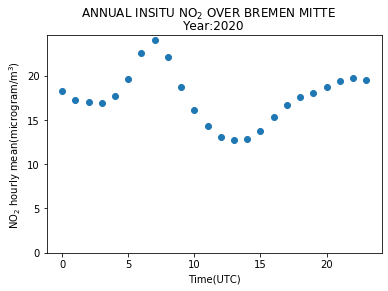

In [6]:
NO2_year=[]
time_year=[]
#MIN_COUNT=15
#count = []
for j in range(0,24):# (0,24);0 A.M. is the starting time of the day and 23 P.M. is the ending one through ALL months
    #if (insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1)), 'NO2'].count()) > MIN_COUNT:
    time_year.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1)), 'hour'].mean()) 
    NO2_year.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1)), 'NO2'].mean())
    #count.append(insitu_data_day.loc[(insitu_data_day['hour']>=j) & (insitu_data_day['hour']<(j+1)), 'hour'].count())
#print(count)
#print(len(time_year))
plt.scatter(time_year,NO2_year)
plt.ylim(bottom=0)
plt.suptitle('ANNUAL INSITU NO$_2$ OVER BREMEN MITTE')
plt.title('Year:2020') 
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ hourly mean(microgram/m$^3$)')
plt.show()

## A.2 Hourly mean NO2 column averaged over all viewing directions separated data by weekdays and weekends

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]


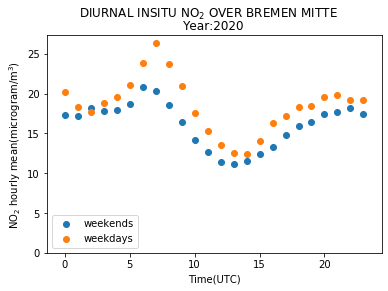

In [7]:
time_weekend=[]
NO2_weekend=[]
time_week=[]
NO2_week=[]
day_week_name='Saturday'or 'Sunday'
for j in range(0,24):
    time_weekend.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'hour'].mean()) 
    NO2_weekend.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'NO2'].mean())
print(time_weekend)

day_week_name=('Monday'or 'Tuesday'or'Wednesday'or'Thursday'or'Friday')
for j in range(0,24):
    time_week.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'hour'].mean()) 
    NO2_week.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'NO2'].mean())

plt.scatter(time_weekend,NO2_weekend,label= 'weekends')
plt.scatter(time_week,NO2_week,label= 'weekdays')
plt.legend()
plt.legend(loc = 'lower left')
plt.ylim(bottom=0)
#plt.ylim(top=9*1e16)
plt.suptitle('DIURNAL INSITU NO$_2$ OVER BREMEN MITTE')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ hourly mean(microgram/m$^3$)')
plt.show()





[8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]
28
[18.5, 15.0, 14.75, 15.0, 15.0, 14.5, 15.75, 18.0, 27.25, 26.0, 24.25, 19.5, 18.0, 17.0, 19.0, 19.5, 19.5, 15.0, 15.6, 16.4, 15.6, 14.0, 13.0, 12.4, 11.0, 11.2, 13.8, 16.8]


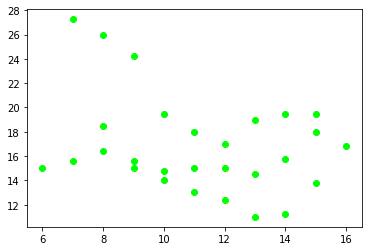

In [8]:
time_collective_weekend_mdoas=[]
NO2_collective_weekend_mdoas=[]
time_DJF_weekend = []
NO2_DJF_weekend = []
mon=12
day_week_name='Saturday'or 'Sunday'
for j in range(8,16):
    time_collective_weekend_mdoas.append(insitu_data.loc[(insitu_data['month']==mon)& (insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'hour'].mean()) 
    NO2_collective_weekend_mdoas.append(insitu_data.loc[(insitu_data['month']==mon) & (insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'NO2'].mean())

mon=1
for j in range(7,16):
    time_collective_weekend_mdoas.append(insitu_data.loc[(insitu_data['month']==mon)& (insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'hour'].mean()) 
    NO2_collective_weekend_mdoas.append(insitu_data.loc[(insitu_data['month']==mon) & (insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'NO2'].mean())

month =2
for j in range(6,17):
    time_collective_weekend_mdoas.append(insitu_data.loc[(insitu_data['month']==month)& (insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'hour'].mean()) 
    NO2_collective_weekend_mdoas.append(insitu_data.loc[(insitu_data['month']==month) & (insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'NO2'].mean())

#time_DJF_weekend.append(time_collective_weekend_mdoas)
#NO2_DJF_weekend.append(NO2_collective_weekend_mdoas)
    

    

print(time_collective_weekend_mdoas)
print(len(time_collective_weekend_mdoas))
print(NO2_collective_weekend_mdoas)

plt.scatter(time_collective_weekend_mdoas,NO2_collective_weekend_mdoas,label= 'weekends Jan',color = 'lime')
#plt.scatter(time_DJF_week,NO2_DJF_week,label= 'week Jan',color = 'red')

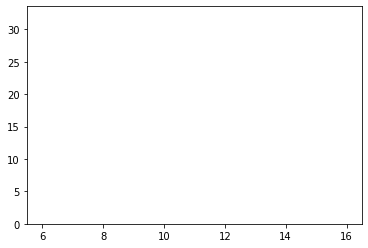

<Figure size 432x288 with 0 Axes>

In [9]:
time_collective_week_mdoas=[]
NO2_collective_week_mdoas=[]
time_DJF_week=[]
NO2_DJF_week=[]
day_week_name=('Monday'or 'Tuesday'or'Wednesday'or'Thursday'or'Friday')
month = 1
for j in range(7,16):
    time_collective_week_mdoas.append(insitu_data.loc[(insitu_data['month']==month) & (insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'hour'].mean()) 
    NO2_collective_week_mdoas.append(insitu_data.loc[(insitu_data['month']==month) & (insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'NO2'].mean())
    
month = 2
for j in range(6,17):
    time_collective_week_mdoas.append(insitu_data.loc[(insitu_data['month']==month) & (insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'hour'].mean()) 
    NO2_collective_week_mdoas.append(insitu_data.loc[(insitu_data['month']==month) & (insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'NO2'].mean())
time_DJF_week.append(time_collective_week_mdoas)

NO2_DJF_week.append(NO2_collective_week_mdoas)
plt.plot(time_DJF_week,NO2_DJF_week,label= 'weekends Jan',color = 'lime')
plt.ylim(bottom = 0)
plt.figure()
plt.show()

## A.2.1 Choose same time as in max-doas.

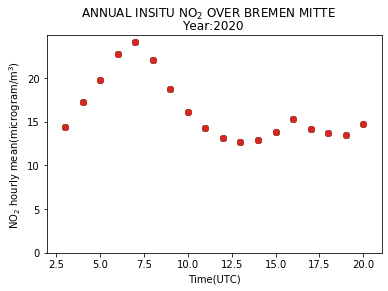

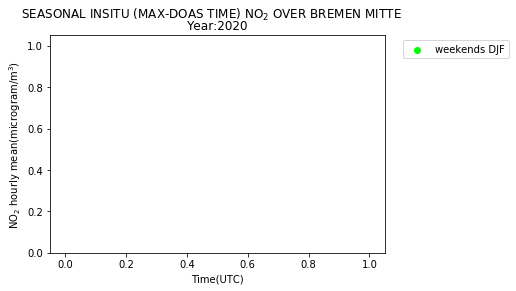

In [27]:
min_time = [ 7, 6, 5, 4, 3, 3, 4, 4, 6, 6, 7, 8];
max_time = [16,17,18,19,19,20,20,19,17,16,16,16];

# Create copy of data but including only those times for which MAX-DOAS data is available

insitu_data_sel= insitu_data[(insitu_data['month']==1) & (insitu_data['hour']>=min_time[0]) & (insitu_data['hour']<=max_time[0]) |
                             (insitu_data['month']==2) & (insitu_data['hour']>=min_time[1]) & (insitu_data['hour']<=max_time[1]) |
                             (insitu_data['month']==3) & (insitu_data['hour']>=min_time[2]) & (insitu_data['hour']<=max_time[2]) |
                             (insitu_data['month']==4) & (insitu_data['hour']>=min_time[3]) & (insitu_data['hour']<=max_time[3]) |
                             (insitu_data['month']==5) & (insitu_data['hour']>=min_time[4]) & (insitu_data['hour']<=max_time[4]) |
                             (insitu_data['month']==6) & (insitu_data['hour']>=min_time[5]) & (insitu_data['hour']<=max_time[5]) |
                             (insitu_data['month']==7) & (insitu_data['hour']>=min_time[6]) & (insitu_data['hour']<=max_time[6]) |
                             (insitu_data['month']==8) & (insitu_data['hour']>=min_time[7]) & (insitu_data['hour']<=max_time[7]) |
                             (insitu_data['month']==9) & (insitu_data['hour']>=min_time[8]) & (insitu_data['hour']<=max_time[8]) |
                             (insitu_data['month']==10) & (insitu_data['hour']>=min_time[9]) & (insitu_data['hour']<=max_time[9]) |
                             (insitu_data['month']==11) & (insitu_data['hour']>=min_time[10]) & (insitu_data['hour']<=max_time[10]) |
                             (insitu_data['month']==12) & (insitu_data['hour']>=min_time[11]) & (insitu_data['hour']<=max_time[11])
                            ]

#print(insitu_data_sel)

# Create averages as before

NO2_year_sel=[]
time_year_sel=[]

for j in range(0,24):# (0,24);0 A.M. is the starting time of the day and 23 P.M. is the ending one through ALL months
    time_year_sel.append(insitu_data_sel.loc[(insitu_data_sel['hour']>=j) & (insitu_data_sel['hour']<(j+1)), 'hour'].mean()) 
    NO2_year_sel.append(insitu_data_sel.loc[(insitu_data_sel['hour']>=j) & (insitu_data_sel['hour']<(j+1)), 'NO2'].mean())

    plt.scatter(time_year_sel,NO2_year_sel)
plt.ylim(bottom=0)
plt.suptitle('ANNUAL INSITU NO$_2$ OVER BREMEN MITTE')
plt.title('Year:2020') 
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ hourly mean(microgram/m$^3$)')
plt.show()

# ... and so on...

#plt.scatter(time_collective_DJF_week_mdoas,NO2_collective_DJF_week_mdoas,label= 'weekends DJF',color = 'lime')
#plt.scatter(time_DJF_weekend,NO2_DJF_weekend,label= 'weekends DJF',color = 'lime')
#plt.scatter(time_DJF_week,NO2_DJF_week,label= 'weekdays DJF', color = 'grey')
#plt.scatter(time_MAM_weekend,NO2_MAM_weekend,label= 'weekends MAM',color = 'brown')
#plt.scatter(time_MAM_week,NO2_MAM_week,label= 'weekdays MAM', color = 'red')
#plt.scatter(time_JJA_weekend,NO2_JJA_weekend,label= 'weekends JJA',color = 'yellowgreen')
#plt.scatter(time_JJA_week,NO2_JJA_week,label= 'weekdays JJA',color = 'indigo')
#plt.scatter(time_SON_weekend,NO2_SON_weekend,label= 'weekends SON')
#plt.scatter(time_SON_week,NO2_SON_week,label= 'weekdays SON',color = 'blue')
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.ylim(bottom=0)
#plt.suptitle('SEASONAL INSITU (MAX-DOAS TIME) NO$_2$ OVER BREMEN MITTE')
#plt.title('Year:2020')
#plt.xlabel('Time(UTC)') 
#plt.ylabel('NO$_2$ hourly mean(microgram/m$^3$)')
#plt.show()
    
    

## A.3 Monthly average of NO2 column

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]


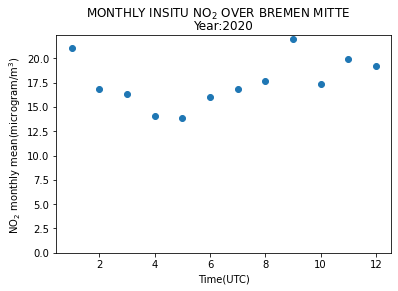

In [106]:
time_month=[]
NO2_month=[]

for month in range(1,13):
    time_month.append(insitu_data.loc[ (insitu_data['month']==month) , 'month'].mean())
    #print(time_month)
    NO2_month.append(insitu_data.loc[(insitu_data['month']==month) , 'NO2'].mean())
print(time_month)
plt.scatter(time_month,NO2_month)
plt.ylim(bottom = 0)
#plt.ylim(top=5*1e17)
plt.suptitle('MONTHLY INSITU NO$_2$ OVER BREMEN MITTE')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ monthly mean(microgram/m$^3$)')
plt.show()

## A.4 Add a time of day figure including 4 lines, one for each season for NO2 column

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]
24
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]


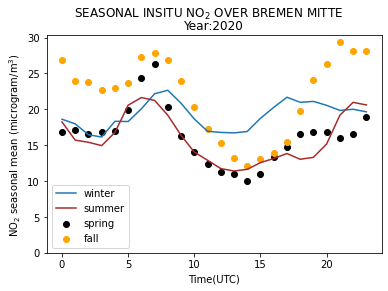

In [112]:
time_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
NO2_DJF=[]
time_MAM=[]
NO2_MAM=[]
time_JJA=[]
NO2_JJA=[]
time_SON=[]
NO2_SON=[]



month=12 or 1 or 2
for j in range(0,24):
    time_DJF.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'hour'].mean()) 
    NO2_DJF.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'NO2'].mean())
print(time_DJF)
print(len(time_DJF))
    

month=3 or 4 or 5 
for j in range(0,24):
    time_MAM.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'hour'].mean()) 
    NO2_MAM.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'NO2'].mean())
print(time_MAM)

month=6 or 7 or 8 
for j in range(0,24):
    time_JJA.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'hour'].mean()) 
    NO2_JJA.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'NO2'].mean())


month=9 or 10 or 11 
for j in range(0,24):
    time_SON.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'hour'].mean()) 
    NO2_SON.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'NO2'].mean())
    #print(len(NO2_SON))
    
    
plt.plot(time_DJF,NO2_DJF, label = 'winter')
plt.scatter(time_MAM,NO2_MAM, label = 'spring', color = 'black')
plt.plot(time_JJA,NO2_JJA, label ='summer', color = 'brown')
plt.scatter(time_SON,NO2_SON, label = 'fall', color = 'orange')
plt.legend()
plt.ylim(bottom=0)
plt.suptitle('SEASONAL INSITU NO$_2$ OVER BREMEN MITTE')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ seasonal mean (microgram/m$^3$)')
plt.show()